# Taller 2 segundo corte NATALIA MANCIPE- KEVIN HERRERA - NICOLAS ROBLES


Un movimiento armónico con amortiguamiento viene dado por

\begin{equation}
\frac{d^{2}x}{dt^{2}} + \gamma\frac{dx}{dt} + \omega_{0}^{2}x = 0
\end{equation}

a) Encuentre el orden de esta ecuación diferencial y la función respectiva $F\left(t,x,\frac{dx}{dt}\right)$

b) Resuelva por Runge-Kutta de cuarto orden para 2 casos: amortiguamiento débil y amortiguamiento crítico. Haga las 2 gráficas respectivas.

In [32]:
import numpy as np
import matplotlib.pyplot as plt

PUNTO A.

In [33]:
# Parámetros
y = 0.1  
w_0 = 2.0 

def ecuacion(x, dx_dt):
    return -y * dx_dt - w_0**2 * x


In [34]:
x0 = 1
v0 = 0

# Orden de la ecuación diferencial
orden = 2

# Función respectiva F(t, x, dx/dt)
def F(t, variables):
    x, dx_dt = variables
    return ecuacion(x, dx_dt)

print("El orden de la ecuación diferencial es:", orden)

variables_iniciales = [x0, v0]
print("Función respectiva F(t, x, dx/dt):", F(0, variables_iniciales))

El orden de la ecuación diferencial es: 2
Función respectiva F(t, x, dx/dt): -4.0


PUNTO B.

In [35]:
def runge_kutta(h, T, x0, v0, zeta):
    # Definir la función F(t, x, v)
    def F(t, x, v):
        return np.array([v, -v - 2*zeta*w0*x])

    # Parámetros iniciales
    valor_t = np.arange(0, T, h)
    valor_x = np.zeros_like(valor_t)
    valor_v = np.zeros_like(valor_t)

    valor_x[0] = x0
    valor_v[0] = v0

    # Frecuencia angular natural
    w0 = 1

    # Método de Runge-Kutta de cuarto orden
    for i in range(1, len(valor_t)):
        t = valor_t[i-1]
        x = valor_x[i-1]
        v = valor_v[i-1]

        k1 = h * F(t, x, v)
        k2 = h * F(t + h/2, x + k1[0]/2, v + k1[1]/2)
        k3 = h * F(t + h/2, x + k2[0]/2, v + k2[1]/2)
        k4 = h * F(t + h, x + k3[0], v + k3[1])

        valor_x[i] = x + (k1[0] + 2*k2[0] + 2*k3[0] + k4[0]) / 6
        valor_v[i] = v + (k1[1] + 2*k2[1] + 2*k3[1] + k4[1]) / 6

    return valor_t, valor_x, valor_v

In [36]:
# Parámetros iniciales
x0 = 1
v0 = 0
h = 0.01
T = 10

In [37]:
#Amortiguamiento débil
adebil = 0.2
t_adebil, x_adebil, v_adebil = runge_kutta(h, T, x0, v0, adebil)

# Amortiguamiento crítico
acritico = 1
t_acritico, x_acritico, v_acritico = runge_kutta(h, T, x0, v0, acritico)

In [38]:
# Imprimir los resultados
print("Amortiguamiento Débil:")
print("Tiempo:", t_adebil)
print("Posición:", x_adebil)
print("Velocidad:", v_adebil)
print()

print("Amortiguamiento Crítico:")
print("Tiempo:", t_acritico)
print("Posición:", x_acritico)
print("Velocidad:", v_acritico)
print()

Amortiguamiento Débil:
Tiempo: [0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  

GRAFICOS

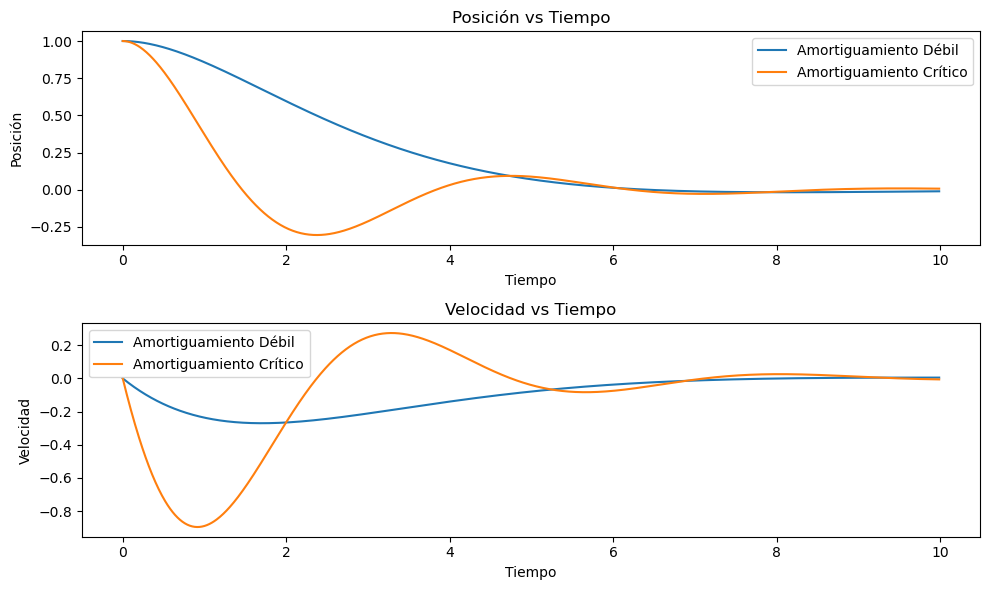

In [39]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t_weak, x_weak, label='Amortiguamiento Débil')
plt.plot(t_critical, x_critical, label='Amortiguamiento Crítico')
plt.title('Posición vs Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t_weak, v_weak, label='Amortiguamiento Débil')
plt.plot(t_critical, v_critical, label='Amortiguamiento Crítico')
plt.title('Velocidad vs Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Velocidad')
plt.legend()

plt.tight_layout()
plt.show()